<a href="https://colab.research.google.com/github/ollihansen90/zeugs/blob/main/SLIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(140, 278, 3)


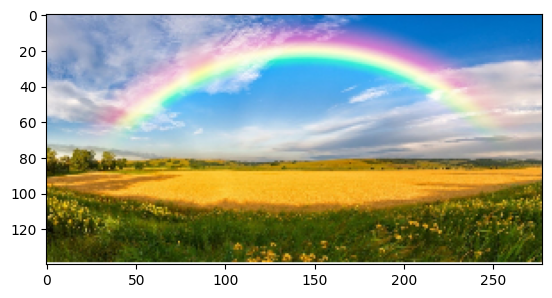

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from tqdm.auto import trange

class kMeans():
    def __init__(self, num_cluster=5, data=None):
        self.codebooks = 3*np.random.rand(num_cluster, 2)-1.5
        if data is not None:
            self.init_codes(data)

    def init_codes(self, data):
        self.codebooks = data[np.random.permutation(len(data))][:len(self.codebooks)]

    def update(self, x):
        out = self.pred(x)
        for c in range(len(self.codebooks)):
            if len(x[out==c])==0:
                continue
            self.codebooks[c] = np.mean(x[out==c], axis=0)

    def pred(self, x):
        dists = np.sqrt(np.sum((x[:,None]-self.codebooks[None])**2, axis=-1)).T
        return np.argmin(dists, axis=0)

    def fit(self, x, verbose=False, max_it=100):
        self.init_codes(x)
        alt = 0
        for i in trange(max_it):
            alt = self.codebooks.copy()
            self.update(x)
            dists = np.sum((alt-self.codebooks)**2, axis=-1)
            if np.max(dists)==0:
                break
        if verbose:
            print(f"{len(self.codebooks)} Zentren wurden in {i+1} Schritten gelernt. Fehler: {self.fehler(x)}")

    def fehler(self, x):
        dists = np.sqrt(np.sum((x[:,None]-self.codebooks[None])**2, axis=-1)).T
        d = np.argmin(dists, axis=0)
        out = 0
        for j,i in enumerate(d):
            out += dists[i,j]
        return out/len(x)

every = 3
#testimg = io.imread("https://i.etsystatic.com/42680663/r/il/d43c98/4964225941/il_1588xN.4964225941_f7nu.jpg").astype(float)[::every,::every]
testimg = io.imread("https://vstudia.de/wp-content/uploads/2021/06/3.jpg").astype(float)[::5,::5]/256
testimg/=np.max(testimg)
print(testimg.shape)
plt.figure()
plt.imshow(testimg)
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

200 Zentren wurden in 36 Schritten gelernt. Fehler: 0.08641594083720447
(38920, 3)


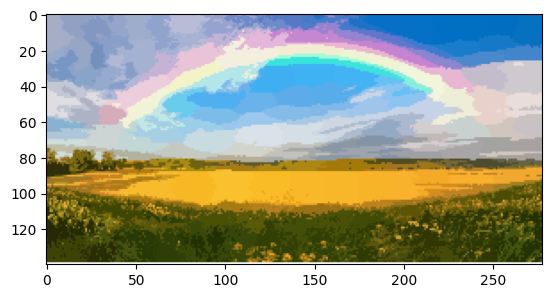

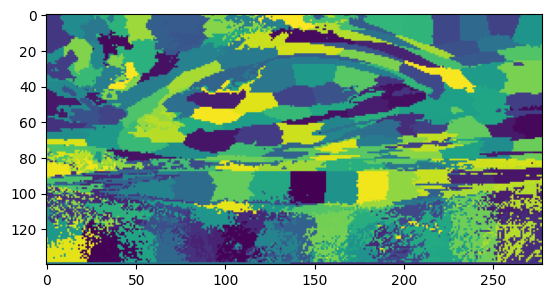

In [ ]:
x,y = np.meshgrid(np.linspace(0,1,num=testimg.shape[1]), np.linspace(0,1,num=testimg.shape[0]))

coordratio = 2
fullimg = np.concat([testimg, coordratio*x[...,None], coordratio*testimg.shape[0]/testimg.shape[1]*y[...,None]], axis=-1)

kmeans = kMeans(num_cluster=200, data=fullimg.reshape(-1,5))
kmeans.fit(fullimg.reshape(-1,5)[::5], True)

out = kmeans.pred(fullimg.reshape(-1,5))
outimg = kmeans.codebooks[out,:3]

print(outimg.shape)
plt.figure()
plt.imshow(outimg.reshape(fullimg.shape[0], fullimg.shape[1],3))
plt.show()
plt.figure()
plt.imshow(out.reshape(fullimg.shape[0], fullimg.shape[1]))
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

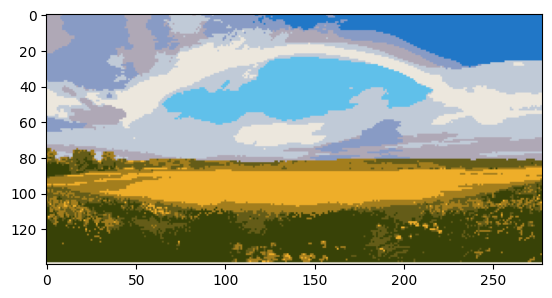

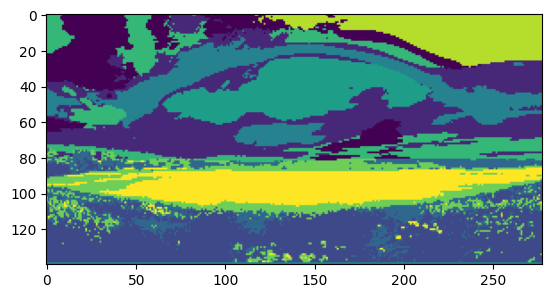

In [ ]:
rekmeans = kMeans(num_cluster=10, data=kmeans.codebooks[:,:3])
rekmeans.fit(kmeans.codebooks[:,:3])
obercluster = rekmeans.pred(kmeans.codebooks[:,:3])

outimg2 = rekmeans.codebooks[obercluster[out]]
plt.figure()
plt.imshow(outimg2.reshape(fullimg.shape[0], fullimg.shape[1],3))
plt.show()
plt.figure()
plt.imshow(obercluster[out].reshape(fullimg.shape[0], fullimg.shape[1]))
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

20 Zentren wurden in 38 Schritten gelernt. Fehler: 0.06861872490916864
(38920, 3)


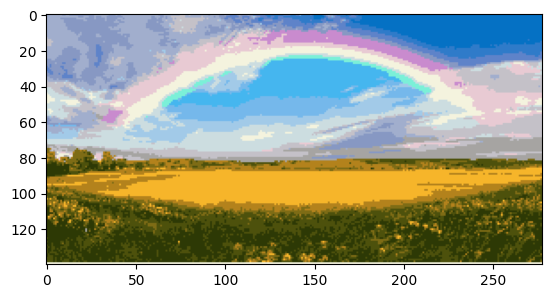

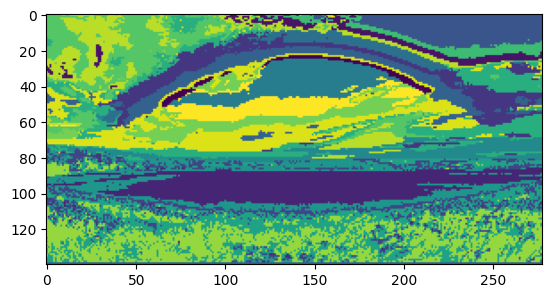

In [ ]:
alteskmeans = kMeans(num_cluster=20, data=testimg.reshape(-1,3))

alteskmeans.fit(testimg.reshape(-1,3)[::5], True)

out = alteskmeans.pred(testimg.reshape(-1,3))
outimg = alteskmeans.codebooks[out,:3]

print(outimg.shape)
plt.figure()
plt.imshow(outimg.reshape(testimg.shape[0], testimg.shape[1],3))
plt.show()
plt.figure()
plt.imshow(out.reshape(testimg.shape[0], testimg.shape[1]))
plt.show()

In [ ]:
print(testimg.shape[0]/testimg.shape[1]*y[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
